In [ ]:
#!pip install fbprophet

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fbprophet import Prophet 
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/HDFC.csv')

In [ ]:
a.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [ ]:
a.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.1,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.8,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.0,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.0,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901
5305,2021-04-30,HDFC,EQ,2538.85,2503.10,2525.0,2411.10,2433.25,2420.10,2445.94,6024595,1.473581e+15,224454.0,3839105.0,0.6372


In [ ]:
a.shape

(5306, 15)

In [ ]:
a.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


In [ ]:
a.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
a['Date'] = pd.to_datetime(a['Date'])

In [ ]:
a.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [ ]:
a1 = a[['Date','High']]
print(a1.shape)
a1.tail()

(5306, 2)


,Date,High
5301,2021-04-26,2534.1
5302,2021-04-27,2526.8
5303,2021-04-28,2609.0
5304,2021-04-29,2628.0
5305,2021-04-30,2525.0


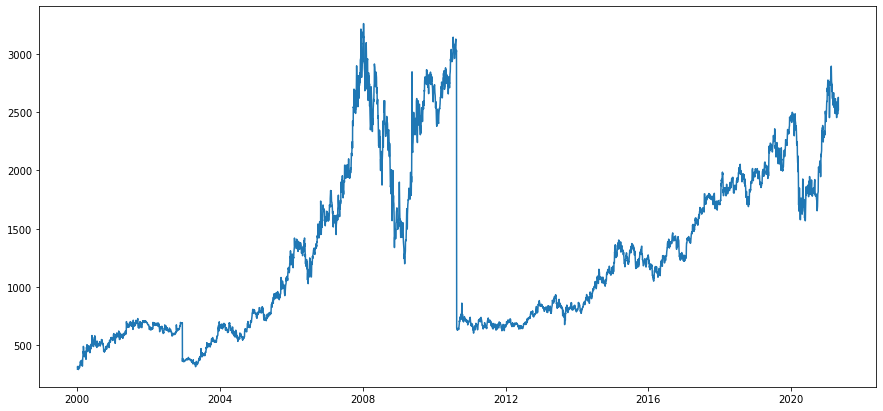

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(a1['Date'], a1['High'])
plt.show()

In [ ]:
a1.tail()

,Date,High
5301,2021-04-26,2534.1
5302,2021-04-27,2526.8
5303,2021-04-28,2609.0
5304,2021-04-29,2628.0
5305,2021-04-30,2525.0


In [ ]:
m = Prophet(daily_seasonality=True,interval_width=0.95)

In [ ]:
a1.columns = ['ds','y']

In [ ]:
a1

,ds,y
0,2000-01-03,293.50
1,2000-01-04,317.00
2,2000-01-05,303.90
3,2000-01-06,314.00
4,2000-01-07,296.35
...,...,...
5301,2021-04-26,2534.10
5302,2021-04-27,2526.80
5303,2021-04-28,2609.00
5304,2021-04-29,2628.00


In [ ]:
model = m.fit(a1)

In [ ]:
predictions = m.make_future_dataframe(periods=60, freq='D')

In [ ]:
result = m.predict(predictions)
result.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5361,2021-06-25,2310.144341,2026.842109,2876.083996,2290.628758,2355.752635,161.285930,161.285930,161.285930,125.30112,125.30112,125.30112,2.505810,2.505810,2.505810,33.479000,33.479000,33.479000,0.0,0.0,0.0,2471.430271
5362,2021-06-26,2310.729333,2099.488422,2931.237942,2289.022273,2359.961476,210.432074,210.432074,210.432074,125.30112,125.30112,125.30112,49.793120,49.793120,49.793120,35.337834,35.337834,35.337834,0.0,0.0,0.0,2521.161407
5363,2021-06-27,2311.314325,2004.221381,2846.048307,2287.394817,2362.119280,105.951879,105.951879,105.951879,125.30112,125.30112,125.30112,-56.417776,-56.417776,-56.417776,37.068535,37.068535,37.068535,0.0,0.0,0.0,2417.266204
5364,2021-06-28,2311.899317,2054.327765,2934.662933,2286.554348,2363.945270,165.073944,165.073944,165.073944,125.30112,125.30112,125.30112,1.122538,1.122538,1.122538,38.650287,38.650287,38.650287,0.0,0.0,0.0,2476.973261
5365,2021-06-29,2312.484309,2078.556924,2924.458923,2284.947446,2365.868016,167.076848,167.076848,167.076848,125.30112,125.30112,125.30112,1.707846,1.707846,1.707846,40.067882,40.067882,40.067882,0.0,0.0,0.0,2479.561158


In [ ]:
result[['ds','yhat']].tail()

,ds,yhat
5361,2021-06-25,2471.430271
5362,2021-06-26,2521.161407
5363,2021-06-27,2417.266204
5364,2021-06-28,2476.973261
5365,2021-06-29,2479.561158


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,result)